In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.utils import to_categorical

In [2]:
tf.compat.v1.disable_eager_execution()

- Model 1-50x50 Grey
- Model 2-128x128 Grey

C:\Users\user\anaconda3\envs\machine\lib\site-packages\tensorflow\python\keras\engine\training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


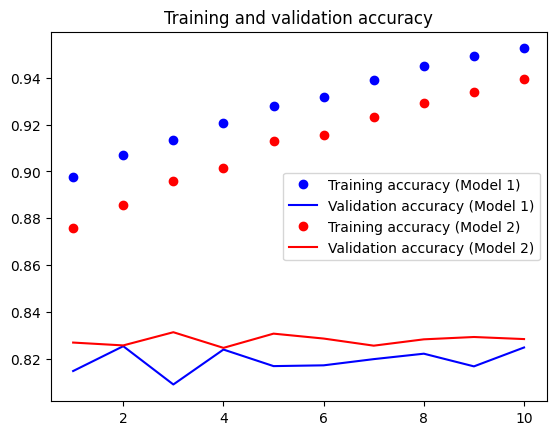

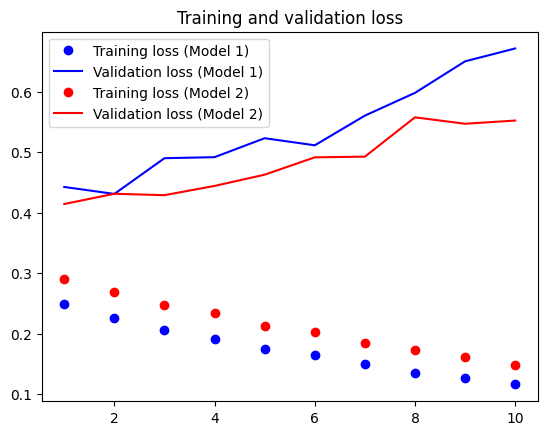

In [3]:
# load the saved models

model1 = load_model('_50G')
model2 = load_model('_128G')

# load your training and validation data for model1
x_train1 = pickle.load(open("X_50_G_train","rb"))
y_train1 = pickle.load(open("y_50_G_train","rb"))
x_test1 = pickle.load(open("X_50_G_test","rb"))
y_test1 = pickle.load(open("y_50_G_test","rb"))

y_test1 = to_categorical(y_test1)

# load your training and validation data for model2
x_train2 = pickle.load(open("X_128_G_train","rb"))
y_train2 = pickle.load(open("y_128_G_train","rb"))
x_test2 = pickle.load(open("X_128_G_test","rb"))
y_test2 = pickle.load(open("y_128_G_test","rb"))

y_test2 = to_categorical(y_test2)

# evaluate model1 on your training and validation data
history1 = model1.fit(x_train1, y_train1, epochs=10, validation_data=(x_test1, y_test1), verbose=0)
train_loss1 = history1.history['loss']
train_acc1 = history1.history['accuracy']
val_loss1 = history1.history['val_loss']
val_acc1 = history1.history['val_accuracy']

# evaluate model2 on your training and validation data
history2 = model2.fit(x_train2, y_train2, epochs=10, validation_data=(x_test2, y_test2), verbose=0)
train_loss2 = history2.history['loss']
train_acc2 = history2.history['accuracy']
val_loss2 = history2.history['val_loss']
val_acc2 = history2.history['val_accuracy']

# plot the training and validation accuracy and loss for both models
epochs = range(1, 11)
plt.plot(epochs, train_acc1, 'bo', label='Training accuracy (Model 1)')
plt.plot(epochs, val_acc1, 'b', label='Validation accuracy (Model 1)')
plt.plot(epochs, train_acc2, 'ro', label='Training accuracy (Model 2)')
plt.plot(epochs, val_acc2, 'r', label='Validation accuracy (Model 2)')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss1, 'bo', label='Training loss (Model 1)')
plt.plot(epochs, val_loss1, 'b', label='Validation loss (Model 1)')
plt.plot(epochs, train_loss2, 'ro', label='Training loss (Model 2)')
plt.plot(epochs, val_loss2, 'r', label='Validation loss (Model 2)')
plt.title('Training and validation loss')
plt.legend()
plt.show()


C:\Users\user\anaconda3\envs\machine\lib\site-packages\tensorflow\python\keras\engine\training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


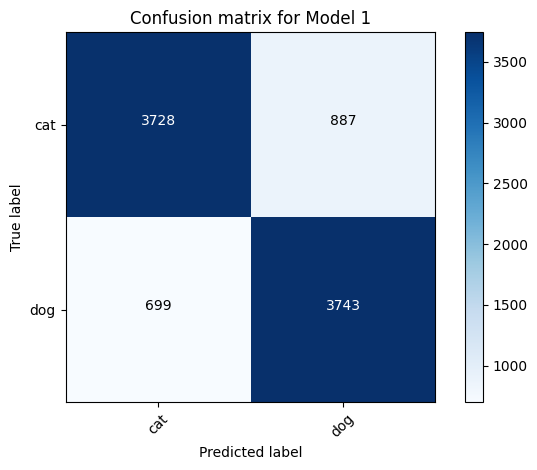

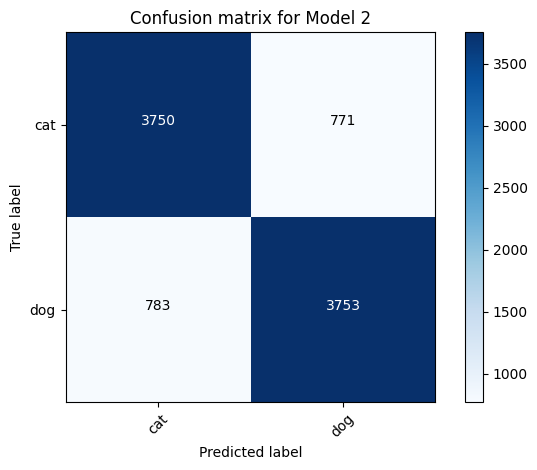

In [7]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# make predictions for model 1
y_pred1 = np.argmax(model1.predict(x_test1), axis=1)

# make predictions for model 2
y_pred2 = np.argmax(model2.predict(x_test2), axis=1)
    
# create confusion matrices for both models
cm1 = confusion_matrix(np.argmax(y_test1, axis=1), y_pred1)
cm2 = confusion_matrix(np.argmax(y_test2, axis=1), y_pred2)

# define the class labels
class_names = ['cat', 'dog']

# plot the confusion matrix for Model 1
plt.figure()
plot_confusion_matrix(cm1, classes=class_names, title='Confusion matrix for Model 1')
plt.show()

# plot the confusion matrix for Model 2
plt.figure()
plot_confusion_matrix(cm2, classes=class_names, title='Confusion matrix for Model 2')
plt.show()


Model 1 does better for train about 0.02 better.
Model 2 does slightly better for validation about 0.01.
However, both does bad for validation loss starting about 0.4.
It can be seen that after 6 epochs, the validation loss for both models increased significantly therefore, overfeeding.
Model 1 has 0.824 of correct prediction and model 2 has 0.828 of correct prediction.

Model 1 has 0.152 of predicting dog incorrectly and 0.192 of predicting cat incorrectly.
Model 2 has 0.173 of predicting dog incorrectly and 0.171 of predicting cat incorrectly.
It can be seen that in the confusion matrix that Model 1 has a low error of predicting dog incorrectly and model 2 has a lower error of predicting cat incorrectly.

Downscaling helped prevent overfitting by reducing the complexity of the model and preventing it from learning noise in the data
However in my case, downscaling cause loss of important features or details in the images, causing the model to memorize the training data instead of learning generalizable patterns.


What can be done to have a better model is use dropout or regularization techniques like kernel_regularizer and bias_regularizer.